In [2]:
import numpy as np
import pandas as pd
import os
import gc

In [3]:
import csv
from operator import le, eq
from more_itertools import numeric_range

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import functools
import time
import sklearn
from sklearn.ensemble import RandomForestClassifier

### version of python & libraries

In [5]:
import sys
print(sys.version)
print('numpy version',np.__version__)
print('pandas version',pd.__version__)
print('sklearn version',sklearn.__version__)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy version 1.20.1
pandas version 1.2.4
sklearn version 0.24.1


In [6]:
os.chdir(r'C:\Users\saura\OneDrive\Documents\IIT Hyderabad\Assignments\ML\Assignment_3')
os.listdir()

['Answers', 'loan_test.csv', 'loan_train.csv', 'Self Study', 'spam.data.txt']

In [7]:
myname = 'Sauradeep-Debnath-'

# LOAD datasets

In [8]:
spam_df = pd.read_csv('spam.data.txt', delimiter = " ", header=None)
print(set(spam_df.dtypes.tolist()))
spam_df.head()

{dtype('float64'), dtype('int64')}


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### checking the distribution of positive & negative classes 

In [9]:
spam_df[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

### separating the x /features from the dataset

In [10]:
spam_df_X = spam_df.iloc[:,:-1].astype(np.float32)
spam_target_Y = spam_df.iloc[:,-1].astype(np.int16)
spam_df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


In [11]:
spam_target_Y.dtypes

dtype('int16')

### Test Train Split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(spam_df_X, spam_target_Y, test_size=0.3, random_state=11)

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
3049,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1.0,6.0
872,0.45,0.00,0.67,0.0,0.22,0.67,0.0,0.67,0.22,0.22,...,0.0,0.0,0.111,0.0,1.599,0.148,0.0,4.947,102.0,564.0
3225,2.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,5.888,29.0,53.0
3135,0.00,14.28,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.800,5.0,9.0
4124,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.219,0.0,0.000,0.000,0.0,1.225,5.0,49.0


# Decision Tree Helper functions 

In [14]:
def get_impurity(labels, criteria = 'entropy'):
    '''
        Gets the impurity of a given node
        Input Parameters
        ----------
        labels : list
            holds the list of class labels
        criteria : string
            possible values : 'entropy', 'gini'
            default value : 'entropy'
        Returns
        --------------
        impurity : float
            impurity of a given node either as per entropy or gini impurity criteria
        '''
    _,count_labels = np.unique(labels, return_counts=True) # get the counts of elements belonging to each class
    prob_i = count_labels / len(labels) # probability of i-th class 
    if criteria == 'entropy':
        return -np.sum(prob_i*np.log2(prob_i)) # Entropy
    elif criteria == 'gini':
        return 1-np.sum(prob_i*prob_i) # Gini impurity
#counts = get_impurity([2,2,4,4,4]) # testing on sample values
#print(counts)

In [15]:
def information_gain(child_nodes, parent_node, criteria = 'entropy'):
        '''
        Gets the impurity reduction when a parent node is divided into child nodes
        Input Parameters
        ----------
        child_nodes : list
            holds child node element as lists inside another list
        parent_node : list
            holds the parent elements as a list
        criteria : string
            possible values : 'entropy', 'gini'
            default value : 'entropy'
        Returns
        --------------
        info_gain : float
            information gain ( reduction in impurity) resulting from the split 
        '''
        parent_impurity = get_impurity(parent_node, criteria)# get entropy/gini impurity , based on parameter "criteria"
        child_impurity_list = [get_impurity(child,criteria) for child in child_nodes]
        child_counts = [len(child) for child in child_nodes] # get the number of elments in each child node
        # get a weighted average of child impurities, weighted by child node sizes
        weighted_avg_child_impurity = np.sum([child_impurity_list[i]*child_counts[i] for i in range(len(child_nodes))])/len(parent_node)
        # get the difference with parent node impurity
        info_gain = parent_impurity - weighted_avg_child_impurity ## get the impurity difference
        return info_gain
#testing on sample values    
#information_gain([[1,1,1],[2,1,2,2]],[1,1,1,2,1,2,2],'gini')#example of values    

#testing the function -- information_gain
information_gain([np.array([1,1,1]),np.array([2,1,2,2])],np.array([1,1,1,2,1,2,2]))

In [16]:
def split_tree(dataset, feature, threshold):
    '''
    Splits the 'dataset' dataframe into two parts based on the chosen threshold & returns them
    
    '''
    condition_check_success_records = dataset[dataset[feature].astype(float)>=threshold]## satisfies the condition
    condition_check_failure_records = dataset[dataset[feature].astype(float)<threshold]## fails the condition
    return condition_check_success_records, condition_check_failure_records

In [17]:

def get_best_threshold(dataset, feature,criteria ,threshold):
    '''for a given feature , find the  best threshold in a Node
    Parameters
    -------------
    dataset - dataframe
        The set of records at a given node we need to split further
    feature - str
        the feature / column/attribute we are checking currently
    threshold -
        the current threshold. We iterate through all the values in of a feature in the function check_all_features() and
        pass them one by one to this function
    Returns 
    -------------
    info_gain : float
        the info gain resulting from the current splitting condition ( threshold, feature)
    threshold : threshold 
        corresponding [info_gain, threshold] are passed a list to check_all_features()
    
    '''
    
    left_tree, right_tree = split_tree(dataset, feature, float(threshold))# success , failure branches
    if left_tree.shape[1] == 0 or right_tree.shape[1] == 0:# If Row number of any branch=0, skip
                return 0, none
    info_gain = information_gain([left_tree.iloc[ :, -1].values, right_tree.iloc[ :, -1].values], dataset.iloc[ :, -1].values, criteria)
    return [info_gain, threshold]
    
                
def check_all_features(dataset,criteria, feature):
    '''for a given node, check all features to find best splitting condition
    Returns
    ------------
    returns [highest_info_gain, feature, best_threshold] where best_threshold is the best threshold to split a given node
    for a given features
    '''
    all_values = list( set(dataset[feature].astype(float)))
    highest_info_gain, optimal_feature, best_threshold =0 ,None, None
    info_gain_list = list(map(functools.partial(get_best_threshold, dataset, feature, criteria),all_values))
    highest_info_gain, best_threshold = max(info_gain_list, key=lambda element: element[0])
    return [highest_info_gain, feature, best_threshold]
                
def best_split_conditions(dataset, criteria):
    '''for a given node , find the best splitting condition ( i.e. which feature to split, at what threshold & 
    what is the resulting information gain)'''
    highest_info_gain = 0  
    num_features = dataset.shape[1] # number of attributes
    optimal_feature, best_threshold =None, None
    col_list  = dataset.columns[:len(dataset.columns)-1].tolist()# get all the input feature list.
    info_gain_list = list(map(functools.partial(check_all_features, dataset, criteria), col_list))
    highest_info_gain, optimal_feature, best_threshold =  max(info_gain_list, key=lambda element: element[0])
    #print(highest_info_gain, optimal_feature, best_threshold)
    return highest_info_gain, optimal_feature, best_threshold

## Tree Node Classes 

In [18]:
class Non_Terminal_DT_Node:
    """
    A class that represents a Non Terminal Node (Decision Node) in a Decision Tree i.e. a node that is subsequently split into other nodes
    ...
    Attributes
    ----------
    true_child_tree : object of the class DecisionTree
        holds the the sub tree / child tree / branch which has elements that satisfy the splitting condition
    false_child_tree : object of the class DecisionTree
        holds the sub tree / child tree / branch which has elements that fails the splitting condition
    optimal_feature : str, best_threshold: float
        together these two attributes give us the best splitting condition at any node
    """

    def __init__(self, true_child_tree, false_child_tree, optimal_feature, best_threshold):
       
        self.true_child_tree = true_child_tree
        self.false_child_tree = false_child_tree
        self.optimal_feature = optimal_feature
        self.best_threshold = best_threshold

In [19]:
class Terminal_Node:
    """
    A class that represents a Terminal Node (Leaf Node) in a Decision Tree i.e. a node that is NOT subsequently split into other nodes
    ...
    Attributes
    ----------
    predicted_classlabel : str
    The Majority class label in a given Leaf Node
    """
    def __init__(self, dataset):
        self.predicted_classlabel = dataset.iloc[:,-1].value_counts().idxmax()#to_dict()

# FUNCTIONS used for  BUILDING the TREE 

In [20]:
 def build_decision_tree(training_set, ig_threshold, criteria, minimum_leaf =5):#
        '''
        builds the decision tree by learning the optimum splitting condition
        Input Parameters
        ----------
        training_set : dataframe
            Holds the records in the current node.
        ig_threshold : float
            If info gain is less than this threshold, stop splitting & ignore the current split
        criteria : string
            possible values : 'entropy', 'gini'
            default value : 'entropy'
        Returns
        --------------
        Non_Terminal_DT_Node : object of class Non_Terminal_DT_Node
            holds the Decision Nodes i.e. the nodes that are split further
        Terminal_Node : object of class Terminal_Node
            holds the terminal /Leaf nodes
        
        '''
        #minimum_leaf = 5 #
        if len(training_set.iloc[:,-1].unique().tolist()) ==1: # IF a node has just one class, declare it as Terminal /Leaf
            return Terminal_Node(training_set)
        elif len(training_set.iloc[:,-1].unique().tolist()) > 1:
            if training_set.shape[0]<=minimum_leaf:  # minimum leaf count based pre pruning
                return Terminal_Node(training_set)
            info_gain, optimal_feature, best_threshold = best_split_conditions(training_set, criteria)
            if info_gain <= ig_threshold :      #impuriity based pruning
                return Terminal_Node(training_set)
            true_child_set, false_child_set = split_tree(training_set, optimal_feature, best_threshold)
            true_child_tree = build_decision_tree(true_child_set, ig_threshold, criteria) # recursively build the true child tree
            false_child_tree = build_decision_tree(false_child_set, ig_threshold, criteria)
            #print(' optimal_feature : '+str(optimal_feature)+' best_threshold : '+str(best_threshold))
            return Non_Terminal_DT_Node(true_child_tree, false_child_tree, optimal_feature, best_threshold)

In [21]:
def classify_test_instance(test_instance, tree_node):
        '''
        classifies a new test instance based on a previously learnt/built decision tree
        Input Parameters
        ----------
        test_instance : nd-array
            Holds the current test instance
        tree_node : object of class DecisionTree
        Returns
        --------------
        predicted_classlabel : str
            the predicted label for the test instance
            '''
        
        result = 0 #
        
        if isinstance(tree_node, Terminal_Node):
            #print('node.label_prediction_dict :'+str(node.label_prediction_dict))
            return tree_node.predicted_classlabel # if it is leaf node, return the class label
        
        test_instance = pd.Series(test_instance)
        if float(test_instance[tree_node.optimal_feature])>=tree_node.best_threshold:
            return classify_test_instance(test_instance, tree_node.true_child_tree )
        else:
            return classify_test_instance(test_instance, tree_node.false_child_tree)

# DECISION TREE CLASS IMPLEMENTATION

In [22]:
class DecisionTree():
    """
    A class that represents a Decision Tree
    ...
    Attributes
    ----------
    ig_threshold : float
        a information gain threshold that tells when to stop splitting the nodes
    criteria : str
        the criteria to measure impurity. Two options entropy(default) and gini impurity

    Methods
    -------
    learn (training_set)
        Learns / builds the decision tree as per the criteria & information gain minimum threshold
    classify (training_set)
        Given a test data, predicts the label based on the existing tree
    """
    def __init__(self,ig_threshold, criteria, minimum_leaf =5):
        self.ig_threshold = ig_threshold
        self.criteria = criteria
        self.minimum_leaf =minimum_leaf 
        tree = {}
    
    def learn(self, training_set):
        # implement this function
        self.tree = build_decision_tree(training_set,self.ig_threshold ,self.criteria, self.minimum_leaf)
        
    # implement this function

    def classify(self, test_instance):
        return classify_test_instance(test_instance, self.tree)

In [23]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'FrameOrSeries', n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        wei

# RANDOM FOREST CLASS IMPLEMENTATION 

In [24]:
class Random_Forest_Custom:
    '''
    A Class that represents a Random Forest.
    Attributes :
    --------------------------------------------------------------------
    total_DT_to_build - how many total trees to build
    list_of_trees - list of trained Decision Trees
    --------------------------------------------
    Methods:
    ---------------------------------------------
    fit_rf_custom - 
    Fits total_DT_to_build number of DTs
    Randomly selects m features/columns without replacement.
    Then randomly selects frac fraction of rows/records with Replacement
    
    rf_predict_custom_v2 - 
    Predicts on the Test data using all the Decision Tree- majority votes
    
    '''
    
    def __init__(self, total_DT_to_build=5):
        self.total_DT_to_build = total_DT_to_build
        # To enlist each decision tree in a list after fitting it on train data
        self.list_of_trees = []
    def fit_rf_custom(self, X,y,m,frac =0.8,seed=0):
        '''
        fits total_DT_to_build Number of Decision Trees to the various Bootstrapped Samples. This method does not return
        OOB accuracy . For OOB, please Random_Forest_Custom_OOB() Class implemented at the bottom portion of the Notebook
        Input Parameters
        -----
        X- Features/ Indepedent Variables
        y - Target / Dependent Variables
        m - how many features to select for fitting each Decision Tree
        frac - how many fraction of records to select from the Train dataset with replacement
        seed - random state
        
        '''

        self.list_of_trees = []
        count_of_DTree_built_so_far = 0
        
        while count_of_DTree_built_so_far < self.total_DT_to_build:
                #print(count_of_DTree_built_so_far,self.total_DT_to_build )
                tree = DecisionTree(0.005,'gini')
                X2 = X.sample(n=m,axis='columns',random_state=seed)# selecting m features randomly
                training_set = X2.copy()
                
                training_set[57] = y
                training_set = training_set.sample(frac = frac,axis='rows',random_state=seed,replace=True)
                # selecting frac fraction of rows , with replacement 
                tree.learn( training_set )
                self.list_of_trees.append(tree)
                count_of_DTree_built_so_far += 1
                print('{} Decision Tree built'.format(count_of_DTree_built_so_far))

    def rf_predict_custom_v2(self, X_test):
        prediction_list,results = [],[]
        prediction_list = np.array([X_test.apply(lambda x: tree.classify(x), axis=1) for tree in self.list_of_trees]).mean(axis =0)
        return prediction_list.astype(np.int16)


In [25]:
gc.collect()

120

# COMMENTED THE BELOW CODES AS I AM CHECKING A LOT OF HYPERPARAMETER COMBINATIONS - HENCE TAKES TIME TO RUN,
# FOR THE OUTPUT OF THESE CELLS PLEASE CHECK THE OTHER NOTEBOOK "Q5_ML_Assignment_RF_CS21MDS14025_DETAILED_NOTEBOOK.ipynb"

# CHECK HOW THE RF PERFORMANCE VARIES WRT. M parameter

# BEST MODEL SELECTED - REST ARE COMMENTED IN THIS NOTEBOOK 
# THIS GIVES 3rd BEST ACCURACY- 
# BUT RUNS in reasonable time

In [51]:
start = time.perf_counter()
model = Random_Forest_Custom(total_DT_to_build =12)

model.fit_rf_custom(X_train,y_train, m = 25 ,frac=1, seed =10)
spam_predicted = model.rf_predict_custom_v2(X_test)
print(accuracy_score(y_test, spam_predicted))
end = time.perf_counter()
print('time taken in minutes : ', str((end - start)/60))
# time taken in minutes :   0.6357081850369771 for 2 DT

1 Decision Tree built
2 Decision Tree built
3 Decision Tree built
4 Decision Tree built
5 Decision Tree built
6 Decision Tree built
7 Decision Tree built
8 Decision Tree built
9 Decision Tree built
10 Decision Tree built
11 Decision Tree built
12 Decision Tree built
0.8921071687183201
time taken in minutes :  13.913658344745636


s = np.array(spam_predicted)
print(X_test.shape)
accuracy_score(y_test, s)


# Comparison with sklearn algo 

In [53]:

start = time.time()
rf = RandomForestClassifier(n_estimators = 12, max_features = 25) 
rf.fit(X_train, y_train)
y_pred_sklearn = rf.predict(X_test)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred_sklearn))
end = time.time()
print('time taken in minutes : ', str(end - start))

ACCURACY OF THE MODEL:  0.945691527878349
time taken in minutes :  0.2420041561126709


# QUESTION 5.b #HOW THE RF PERFORMANCE VARIES WRT. M parameter

In [28]:
start = time.perf_counter()
for m in range(6,40,1):
    rf = RandomForestClassifier(n_estimators = 12, max_features = m) 
    rf.fit(X_train, y_train)
    y_pred_sklearn = rf.predict(X_test)
    print("ACCURACY OF THE MODEL with ",m, " no. of features is ", accuracy_score(y_test, y_pred_sklearn))
    end = time.perf_counter()
print('time taken in minutes : ', str(end - start))

ACCURACY OF THE MODEL with  6  no. of features is  0.945691527878349
ACCURACY OF THE MODEL with  7  no. of features is  0.9514844315713251
ACCURACY OF THE MODEL with  8  no. of features is  0.9543808834178131
ACCURACY OF THE MODEL with  9  no. of features is  0.9471397538015931
ACCURACY OF THE MODEL with  10  no. of features is  0.9507603186097031
ACCURACY OF THE MODEL with  11  no. of features is  0.9500362056480811
ACCURACY OF THE MODEL with  12  no. of features is  0.9536567704561911
ACCURACY OF THE MODEL with  13  no. of features is  0.9478638667632151
ACCURACY OF THE MODEL with  14  no. of features is  0.9514844315713251
ACCURACY OF THE MODEL with  15  no. of features is  0.9543808834178131
ACCURACY OF THE MODEL with  16  no. of features is  0.9529326574945691
ACCURACY OF THE MODEL with  17  no. of features is  0.9485879797248371
ACCURACY OF THE MODEL with  18  no. of features is  0.944243301955105
ACCURACY OF THE MODEL with  19  no. of features is  0.944243301955105
ACCURACY OF T

# QUESTION 5.c  OUT OF BAG ERROR 

# Out of Bag Error

In [31]:
class Random_Forest_Custom_OOB:
    '''
    A Class that represents a Random Forest that also calculates Out of Bag Error .
    Attributes :
    --------------------------------------------------------------------
    total_DT_to_build - how many total trees to build
    list_of_trees - list of trained Decision Trees
    --------------------------------------------
    Methods:
    ---------------------------------------------
    fit_rf_custom - 
    Fits total_DT_to_build number of DTs
    Randomly selects m features/columns without replacement.
    Then randomly selects frac fraction of rows/records with Replacement.
    the Rows NOT selected are considered Out of Bag Samples for each DT.
    
    For each Decision Tree, we check the accuracy for the Out of Bag (OOB) Samples & also print their average Accuracy
    

    
    rf_predict_custom_v2 - 
    Predicts on the Test data using all the Decision Tree- majority votes
    
    '''
    
    def __init__(self, total_DT_to_build=5):
        self.total_DT_to_build = total_DT_to_build
        # To enlist each decision tree in a list after fitting it on train data
        self.list_of_trees = []
    def fit_rf_custom(self, X,y,m,frac =0.8,seed=0):
        '''
        fits total_DT_to_build Number of Decision Trees to the various Bootstrapped Samples. 
        Also returns Out of Bag Accuracy .
        Input Parameters
        -----
        X- Features/ Indepedent Variables
        y - Target / Dependent Variables
        m - how many features to select for fitting each Decision Tree
        frac - how many fraction of records to select from the Train dataset with replacement
        seed - random state
        
        '''

        self.list_of_trees = []
        count_of_DTree_built_so_far = 0
        OOB_accuracy_scores, OOB_errors = [],[]
        while count_of_DTree_built_so_far < self.total_DT_to_build:
                #print(count_of_DTree_built_so_far,self.total_DT_to_build )
                tree = DecisionTree(0.005,'gini')
                X2 = X.sample(n=m,axis='columns',random_state=seed)
                training_set = X2.copy()
                
                training_set[57] = y
                X2[57] = y
                #select frac fraction of rows/records with Replacement i.e. some rows might be repeated
                training_set = training_set.sample(frac = frac,axis='rows',random_state=seed,replace=True)
                training_index = training_set.index
                tree.learn( training_set )# fit the decision tree on the bootstrap sample
                
                remaining_indices = np.setdiff1d(X2.index.values, training_set.index.values)
                ## Create a OOB sample set with the records that were NOT part of bootstrap training sample
                OOB_samples = X2.loc[remaining_indices,:] 
                # predict & check the accuracy on the OOB samples for each Decision Tree
                
                OOB_pred = OOB_samples.apply(lambda x: tree.classify(x), axis=1)
                OOB_accuracy = accuracy_score(OOB_pred,OOB_samples.iloc[:,-1] )
                OOB_accuracy_scores.append(OOB_accuracy)
                OOB_errors.append(1- OOB_accuracy)
                self.list_of_trees.append(tree)
                count_of_DTree_built_so_far += 1
                #print('{} Decision Tree built'.format(count_of_DTree_built_so_far))
        print('Bootstrap sample size',training_set.shape,'OOB sample size ',OOB_samples.shape)
        print('the OOB accuracy scores are ', OOB_accuracy_scores, ' the AVG being : ', np.array(OOB_accuracy_scores).mean())
        print('the OOB errors are ', OOB_errors, ' the AVG being : ', np.array(OOB_errors).mean())
        return OOB_errors


    def rf_predict_custom_v2(self, X_test):
        prediction_list,results = [],[]
        prediction_list = np.array([X_test.apply(lambda x: tree.classify(x), axis=1) for tree in self.list_of_trees]).mean(axis =0)
        return prediction_list.astype(np.int16)


# FOR A SET OF VALUES OF m 

In [35]:
model = Random_Forest_Custom_OOB(total_DT_to_build =12)
avg_OOB_errors, test_errors =[],[]
for m in [6, 8, 12, 16, 20]:

    OOB_errors = model.fit_rf_custom(X_train,y_train, m = m ,frac=.9, seed =10)#19
    avg_OOB_errors.append(np.array(OOB_errors).mean())
    spam_predicted = model.rf_predict_custom_v2(X_test)
    print('test set accuracy for m = ',m, 'is : ', accuracy_score(y_test, spam_predicted))
    test_errors.append(1- accuracy_score(y_test, spam_predicted))


Bootstrap sample size (2898, 7) OOB sample size  (1316, 7)
the OOB accuracy scores are  [0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547, 0.7249240121580547]  the AVG being :  0.7249240121580547
the OOB errors are  [0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453, 0.2750759878419453]  the AVG being :  0.2750759878419453
test set accuracy for m =  6 is :  0.7168718320057929
Bootstrap sample size (2898, 9) OOB sample size  (1316, 9)
the OOB accuracy scores are  [0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.756838905775076, 0.7

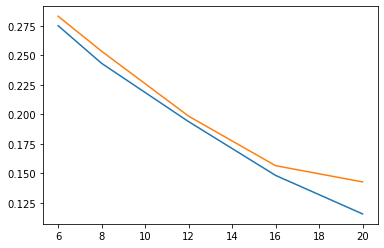

In [36]:
import matplotlib.pyplot as plt 
plt.plot([6, 8, 12, 16, 20], avg_OOB_errors)
plt.plot([6, 8, 12, 16, 20], test_errors)
plt.show()

In [39]:
OOB_Vs_test_df = pd.DataFrame ({"m": [6, 8, 12, 16, 20], "avg_OOB_errors": avg_OOB_errors,"test_errors": test_errors})
OOB_Vs_test_df

,m,avg_OOB_errors,test_errors
0,6,0.275076,0.283128
1,8,0.243161,0.253440
2,12,0.193769,0.198407
3,16,0.148176,0.156408
4,20,0.115502,0.142650
